In [ ]:
https://shitty-bots-inc.github.io/MOXA/index.html
https://link.springer.com/content/pdf/10.1007/s41403-020-00157-z.pdf
https://www.kaggle.com/code/mhmdsyed/face-mask-detection-yolov5


#Yolov3
https://github.com/ultralytics/yolov3

## Darknet -> pytorch (.weight -> .pt)
https://github.com/ultralytics/yolov3/issues/1222

# Yolov3(darknet)
https://github.com/ultralytics/yolov3/tree/archive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
import matplotlib.pyplot as plt
from glob import glob


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
%pip install -q wandb
%pip install -qr requirements.txt  # install


%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov3_darknet
%pip install -qr requirements.txt  # install

# Weights & Biases  (optional)
import wandb
wandb.login()

#restart runtime
# import os
# os.kill(os.getpid(), 9)

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
     |████████████████████████████████| 1.8 MB 8.6 MB/s 
     |████████████████████████████████| 145 kB 72.5 MB/s 
     |████████████████████████████████| 181 kB 73.1 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 596 kB 9.1 MB/s 
/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov3_darknet


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# **Darknet 2 Pytorch**

In [ ]:
#Clone yolov3_pytorch
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection
!git clone https://github.com/ultralytics/yolov3

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection
Cloning into 'yolov3'...
remote: Enumerating objects: 10012, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10012 (delta 3), reused 5 (delta 1), pack-reused 10002
Receiving objects: 100% (10012/10012), 9.33 MiB | 8.69 MiB/s, done.
Resolving deltas: 100% (6750/6750), done.


In [ ]:
# Clone yolov3_darknet
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection
!git clone -b archive https://github.com/ultralytics/yolov3.git

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection
Cloning into 'yolov3'...
remote: Enumerating objects: 10012, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10012 (delta 3), reused 4 (delta 1), pack-reused 10002
Receiving objects: 100% (10012/10012), 9.33 MiB | 8.30 MiB/s, done.
Resolving deltas: 100% (6750/6750), done.


In [ ]:
# Darknet -> pytorch (.weight -> .pt)
import sys
import os

py_file_location = "/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov3"
sys.path.append(os.path.abspath(py_file_location))
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov3
from models import *
import torch
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection
convert('yolov3-tiny.cfg', 'yolov3-tiny_final.weights')

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov3
/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection
Model Summary: 37 layers, 8.67219e+06 parameters, 8.67219e+06 gradients
Success: converted 'yolov3-tiny_final.weights' to 'yolov3-tiny_final.pt'


# **Split Dataset** -> Form yolov5(moxa3k)

['/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/Moxa3K/images/MOXA_136.jpg', '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/Moxa3K/images/MOXA_627.jpg', '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/Moxa3K/images/MOXA_1107.jpg', '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/Moxa3K/images/MOXA_206.jpg', '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/Moxa3K/images/MOXA_2693.jpg', '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/Moxa3K/images/MOXA_1164.jpg', '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/Moxa3K/images/MOXA_397.jpg', '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/Moxa3K/images/MOXA_640.jpg', '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/Moxa3K/images/MOXA_942.jpg', '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/Moxa3K/images/MOXA_1099.jpg', '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/Moxa3K/images/MOXA_34.jpg', '/content/drive/MyDrive/Nam4_HK2/TTTT/F

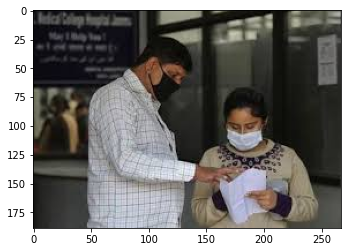

In [ ]:
#read .txt
path = '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection'
train_path = open(path + "/Moxa3K/train.txt", "r")
content = train_path.read()
list_train_path = content.split("\n")
train_path.close()
# print(list_train_path)

test_path = open(path + "/Moxa3K/test.txt", "r")
content_t = test_path.read()
list_test_path = content_t.split("\n")
test_path.close()
# print(list_test_path)

# Create link image
list_train = []
for element in list_train_path:
  list_train += [path+'/'+element]
print(list_train)
list_test = []
for element in list_test_path:
  list_test += [path+'/'+element]
print(list_test)

# Create link annotations
train_annotations = [file.replace('.jpg', '.txt') for file in list_train]
train_annotations = [file.replace('images', 'annotations/Yolo') for file in train_annotations]
print(train_annotations)
test_annotations = [file.replace('.jpg', '.txt') for file in list_test]
test_annotations = [file.replace('images', 'annotations/Yolo') for file in test_annotations]
print(test_annotations)




# test
img_test = cv2.imread(list_test[0])
img_show = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)

annotation_test = open(test_annotations[0], "r")
content = annotation_test.read()
print(content) #str

# class x_center y_center width height      # Scale [0,1]

**Create form Coco_Dataset**

In [ ]:
# dataset_Moxa3k___train__
#                       __images___
#                               ...MOXA_136.jpg      list_train
#                       __labels___                                 train_annotations
#                               ...MOXA_136.txt
# 
#               ___val____images___                  list_test
#              .........__labels___                                 test_annotations

In [ ]:
def get_name(paths):
  return(paths.split('/')[-1])

print(get_name(list_test[0]))

# cv2.imwrite(path + "/dataset_Moxa3k/train/images/" + get_name(list_test[0]),img_test)

# with open(test_annotations[0], "r") as paths:
#   content = paths.read()
#   print(content) #str

# with open(path + "/dataset_Moxa3k/train/labels/" + get_name(test_annotations[0]), "w+") as text_file:
#     text_file.write(content)

# # train/images
# for elm in list_train:
#   name_elm = get_name(elm)
#   img = cv2.imread(elm)
#   cv2.imwrite(path + "/dataset_Moxa3k/train/images/" + name_elm, img)

# #train/labels
# for elm2 in train_annotations:
#   name_elm = get_name(elm2)
#   with open(elm2, "r") as paths:
#     content = paths.read()
#   with open(path + "/dataset_Moxa3k/train/labels/" + name_elm, "w+") as text_file:
#     text_file.write(content)

# #val/images
# for elm3 in list_test:
#   name_elm = get_name(elm3)
#   img = cv2.imread(elm3)
#   cv2.imwrite(path + "/dataset_Moxa3k/val/images/" + name_elm, img)

# #val/labels
# for elm4 in test_annotations:
#   name_elm = get_name(elm4)
#   with open(elm4, "r") as paths:
#     content = paths.read()
#   with open(path + "/dataset_Moxa3k/val/labels/" + name_elm, "w+") as text_file:
#     text_file.write(content)

# **Training Yolov5 - Moxa3k**

In [ ]:
# Create file .yaml
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5

yaml_text = """path: data/dataset_Moxa3k
train: train
val: val
test: test

nc: 2
names: ['no_mask', 'mask']"""

with open("data/moxa3k.yaml", 'w') as file:
    file.write(yaml_text)

%cat data/moxa3k.yaml

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
path: data/dataset_Moxa3k
train: train
val: val
test: test

nc: 2
names: ['no_mask', 'mask']/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov3
path: data/dataset_Moxa3k
train: train
val: val
test: test

nc: 2
names: ['no_mask', 'mask']

In [ ]:
# Train using pre-trained model
# !python train.py --img 416 --batch 16 --epochs 100 --data data/moxa3k.yaml --weights yolov5s.pt --name exp_yolov5s

## **Yolov5s**

In [ ]:
# Train dont using weights
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5

!python train.py --img 416 --batch 16 --epochs 100 --data data/Moxa3K_Yolov5/Moxa3K_Yolov5.yaml --cfg models/yolov5s.yaml --weights '' --name Moxa3K_Yolov5

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
wandb: Currently logged in as: liemkg1234. Use `wandb login --relogin` to force relogin
train: weights=, cfg=models/yolov5s.yaml, data=data/Moxa3K_Yolov5/Moxa3K_Yolov5.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Moxa3K_Yolov5, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
YOLOv5 🚀 v6.1-237-g50b886d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, m

In [ ]:
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5

# Yolov5s
!python val.py --weights runs/train/Moxa3K_Yolov5/weights/best.pt --data data/Moxa3K_Yolov5/Moxa3K_Yolov5.yaml --img 416 --iou 0.5 --task test --name Moxa3K_Yolov5

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
val: data=data/Moxa3K_Yolov5/Moxa3K_Yolov5.yaml, weights=['runs/train/Moxa3K_Yolov5/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.5, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=Moxa3K_Yolov5, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-237-g50b886d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5/data/Moxa3K_Yolov5/test/labels' images and labels...200 found, 0 missing, 0 empty, 0 corrupt: 100% 200/200 [01:05<00:00,  3.07it/s]
test: New cache created: /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5/data/Moxa3K_Yolov5/test/labels.cache
               Clas

## **Eval with Facemask_853**

In [ ]:
# Yolov5
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5

!python val.py --weights runs/train/Moxa3K_Yolov5/weights/best.pt --data data/test_Yolov5_853/test_Yolov5_853.yaml --img 416 --iou 0.5 --task test --name test_Yolov5_853

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
val: data=data/test_Yolov5_853/test_Yolov5_853.yaml, weights=['runs/train/Moxa3K_Yolov5/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.5, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=test_Yolov5_853, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-237-g50b886d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5/data/test_Yolov5_853/test/labels.cache' images and labels... 848 found, 0 missing, 0 empty, 0 corrupt: 100% 848/848 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 27/27 [00:10<00:00,  2.67it/s]
              

## **Training model with ds853**

In [ ]:
# Train dont using weights
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5

!python train.py --img 416 --batch 16 --epochs 100 --data data/853_Yolov5/853_Yolov5.yaml --cfg models/yolov5s.yaml --weights '' --name 853_Yolov5

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
wandb: Currently logged in as: liemkg1234. Use `wandb login --relogin` to force relogin
train: weights=, cfg=models/yolov5s.yaml, data=data/853_Yolov5/853_Yolov5.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=853_Yolov5, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
YOLOv5 🚀 v6.1-237-g50b886d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0

In [ ]:
# Yolov5
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5

!python val.py --weights runs/train/853_Yolov5/weights/best.pt --data data/853_Yolov5/853_Yolov5.yaml --img 416 --iou 0.5 --task test --name 853_Yolov5

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
val: data=data/853_Yolov5/853_Yolov5.yaml, weights=['runs/train/853_Yolov5/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.5, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=853_Yolov5, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-237-g50b886d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients
test: Scanning '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5/data/853_Yolov5/test/labels' images and labels...53 found, 0 missing, 0 empty, 0 corrupt: 100% 53/53 [00:34<00:00,  1.52it/s]
test: New cache created: /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5/data/853_Yolov5/test/labels.cache
               Class     Images     Labels          P

test

In [ ]:
#Test
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5

# !python detect.py --weights runs/train/Moxa3K_Yolov5/weights/best.pt --data data/Moxa3K_Yolov5/Moxa3K_Yolov5.yaml --img 416 --source data/Moxa3K_Yolov5/test/images --name test_Moxa3K_Yolov5

# !python detect.py --weights runs/train/Moxa3K_Yolov5/weights/best.pt --data data/Moxa3K_Yolov5/Moxa3K_Yolov5.yaml --img 416 --source data/test_Yolov5_853/test/images --name test_Moxa3K_Yolov5_853

!python detect.py --weights runs/train/853_Yolov5/weights/best.pt --data data/853_Yolov5/853_Yolov5.yaml --img 416 --source data/853_Yolov5/test/images --name test_853

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
detect: weights=['runs/train/853_Yolov5/weights/best.pt'], source=data/853_Yolov5/test/images, data=data/853_Yolov5/853_Yolov5.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=test_853, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-237-g50b886d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients
image 1/53 /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5/data/853_Yolov5/test/images/maksssksksss800_png_jpg.rf.9b43499a9419ef30111b418a279cae54.jpg: 288x416 1 no_mask, 6 masks, Done. (0.011s)
image 2/53 /content/drive/MyDrive/Nam4_HK2/TTTT/Fa

# **Yolov3-Tiny**

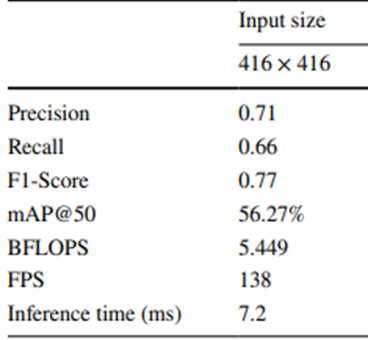

## **Eval_200images_moxa3k**

In [ ]:
#Yolov3-tiny Darknet 
#                [-h] [--cfg CFG] [--data DATA] [--weights WEIGHTS]
#                [--batch-size BATCH_SIZE] [--img-size IMG_SIZE]
#                [--conf-thres CONF_THRES] [--iou-thres IOU_THRES] [--save-json]
#                [--task TASK] [--device DEVICE] [--single-cls] [--augment]

%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov3_darknet

!python3 test.py --cfg cfg/yolov3-tiny_moxa3k.cfg --data data/Moxa3K_Yolov3/Moxa3K_yolov3.data --weights weights/yolov3-tiny_final.weights --img-size 416 --task test

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov3_darknet
Namespace(augment=False, batch_size=16, cfg='cfg/yolov3-tiny_moxa3k.cfg', conf_thres=0.001, data='data/Moxa3K_Yolov3/Moxa3K_yolov3.data', device='', img_size=416, iou_thres=0.6, save_json=False, single_cls=False, task='test', weights='weights/yolov3-tiny_final.weights')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 37 layers, 8.67219e+06 parameters, 8.67219e+06 gradients, 9.7 GFLOPS
Fusing layers...
Model Summary: 26 layers, 8.669e+06 parameters, 8.669e+06 gradients, 9.7 GFLOPS
Caching labels data/Moxa3K_Yolov3/test.txt (200 found, 0 missing, 0 emp

## **Eval_ds853**

In [ ]:
#Yolov3-tiny Darknet 

%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov3_darknet

!python3 test.py --cfg cfg/yolov3-tiny_moxa3k.cfg --data data/test_Yolov3_853/test_Yolov3_853.data --weights weights/yolov3-tiny_final.weights --img-size 416 --task test

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov3_darknet
Namespace(augment=False, batch_size=16, cfg='cfg/yolov3-tiny_moxa3k.cfg', conf_thres=0.001, data='data/test_Yolov3_853/test_Yolov3_853.data', device='', img_size=416, iou_thres=0.6, save_json=False, single_cls=False, task='test', weights='weights/yolov3-tiny_final.weights')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 37 layers, 8.67219e+06 parameters, 8.67219e+06 gradients, 9.7 GFLOPS
Fusing layers...
Model Summary: 26 layers, 8.669e+06 parameters, 8.669e+06 gradients, 9.7 GFLOPS
Reading image shapes: 100% 848/848 [04:42<00:00,  3.01it/s]
Caching

## **Traing with ds853**

In [ ]:
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov3_darknet
# [-h] [--epochs EPOCHS] [--batch-size BATCH_SIZE] [--cfg CFG]
#                 [--data DATA] [--multi-scale]
#                 [--img-size IMG_SIZE [IMG_SIZE ...]] [--rect] [--resume]
#                 [--nosave] [--notest] [--evolve] [--bucket BUCKET]
#                 [--cache-images] [--weights WEIGHTS] [--name NAME]
#                 [--device DEVICE] [--adam] [--single-cls] [--freeze-layers]


!python train.py --img 416 --batch 16 --epochs 100 --cfg cfg/yolov3-tiny_moxa3k.cfg --data data/853_Yolov3/853_Yolov3.data --weights '' --name 853_Yolov3


/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov3_darknet
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (4/4), done.
remote: Total 5 (delta 4), reused 4 (delta 4), pack-reused 1
Unpacking objects: 100% (5/5), done.
From https://github.com/ultralytics/yolov3
   3508a98..0aa65ef  master     -> origin/master
Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='cfg/yolov3-tiny_moxa3k.cfg', data='data/853_Yolov3/853_Yolov3.data', device='', epochs=100, evolve=False, freeze_layers=False, img_size=[416], multi_scale=False, name='853_Yolov3', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 37 layers, 8.67219e+06 parameters, 8.67219

In [ ]:
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov3_darknet

!python3 test.py --cfg cfg/yolov3-tiny_moxa3k.cfg --data data/853_Yolov3/test.data --weights weights/best_853_Yolov3.pt --img-size 416

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov3_darknet
Namespace(augment=False, batch_size=16, cfg='cfg/yolov3-tiny_moxa3k.cfg', conf_thres=0.001, data='data/853_Yolov3/test.data', device='', img_size=416, iou_thres=0.6, save_json=False, single_cls=False, task='test', weights='weights/best_853_Yolov3.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 37 layers, 8.67219e+06 parameters, 8.67219e+06 gradients
Fusing layers...
Model Summary: 26 layers, 8.669e+06 parameters, 8.669e+06 gradients
Reading image shapes: 100% 53/53 [00:13<00:00,  3.79it/s]
Caching labels data/853_Yolov3/test.txt (53 found, 0 missing, 0 empty, 0 duplicate, for 53 images): 100% 53/53 [00:13<00:00,  3.82it/s]
/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cp

# **Yolov5s6**

## **Moxa3K**

In [ ]:
# Traning moxa3k dataset
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5

!python train.py --img 416 --batch 16 --epochs 100 --data data/Moxa3K_Yolov5/Moxa3K_Yolov5.yaml --cfg models/hub/yolov5s6.yaml --weights '' --name Moxa3K_Yolov5s6

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
wandb: Currently logged in as: liemkg1234. Use `wandb login --relogin` to force relogin
train: weights=, cfg=models/hub/yolov5s6.yaml, data=data/Moxa3K_Yolov5/Moxa3K_Yolov5.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Moxa3K_Yolov5s6, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 13 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-237-g50b886d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB,

In [ ]:
#Test
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
!python val.py --weights runs/train/Moxa3K_Yolov5s6/weights/best.pt --data data/Moxa3K_Yolov5/Moxa3K_Yolov5.yaml --img 416 --iou 0.5 --task test --name Moxa3K_Yolov5s6

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
val: data=data/Moxa3K_Yolov5/Moxa3K_Yolov5.yaml, weights=['runs/train/Moxa3K_Yolov5s6/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.5, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=Moxa3K_Yolov5s6, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-237-g50b886d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s6 summary: 280 layers, 12312052 parameters, 0 gradients, 16.2 GFLOPs
test: Scanning '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5/data/Moxa3K_Yolov5/test/labels.cache' images and labels... 200 found, 0 missing, 0 empty, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 7/7 [00:07<00:00,  1.13s/it]
                 a

## **Eval Ds853**

In [ ]:
#Eval ds853
# Yolov5s6
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
!python val.py --weights runs/train/Moxa3K_Yolov5s6/weights/best.pt --data data/test_Yolov5_853/test_Yolov5_853.yaml --img 416 --iou 0.5 --task test --name test_Yolov5s6_853

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
val: data=data/test_Yolov5_853/test_Yolov5_853.yaml, weights=['runs/train/Moxa3K_Yolov5s6/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.5, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=test_Yolov5s6_853, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-237-g50b886d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s6 summary: 280 layers, 12312052 parameters, 0 gradients, 16.2 GFLOPs
test: Scanning '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5/data/test_Yolov5_853/test/labels.cache' images and labels... 848 found, 0 missing, 0 empty, 0 corrupt: 100% 848/848 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 27/27 [00:23<00:00,  1.13it/s]
        

## **Facemask_853**

In [ ]:
# Traing facemask_853
#Yolov5s6
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5

!python train.py --img 416 --batch 16 --epochs 100 --data data/853_Yolov5/853_Yolov5.yaml --cfg models/hub/yolov5s6.yaml --weights '' --name 853_Yolov5s6

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
wandb: Currently logged in as: liemkg1234. Use `wandb login --relogin` to force relogin
train: weights=, cfg=models/hub/yolov5s6.yaml, data=data/853_Yolov5/853_Yolov5.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=853_Yolov5s6, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 13 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-237-g50b886d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB

In [ ]:
#Test
!python val.py --weights runs/train/853_Yolov5s6/weights/best.pt --data data/Moxa3K_Yolov5/Moxa3K_Yolov5.yaml --img 416 --iou 0.5 --task test --name 853_Yolov5s6

val: data=data/Moxa3K_Yolov5/Moxa3K_Yolov5.yaml, weights=['runs/train/853_Yolov5s6/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.5, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=853_Yolov5s6, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-237-g50b886d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s6 summary: 280 layers, 12312052 parameters, 0 gradients, 16.2 GFLOPs
test: Scanning '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5/data/Moxa3K_Yolov5/test/labels.cache' images and labels... 200 found, 0 missing, 0 empty, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 7/7 [00:05<00:00,  1.20it/s]
                 all        200        902      0.529      0.458      0.401        0.1
 

# **Yolov5x**

## **Moxa3k**

In [ ]:
# Traning moxa3k dataset
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5

!python train.py --img 416 --batch 16 --epochs 100 --data data/Moxa3K_Yolov5/Moxa3K_Yolov5.yaml --cfg models/yolov5x.yaml --weights '' --name Moxa3K_Yolov5x

wandb: Currently logged in as: liemkg1234. Use `wandb login --relogin` to force relogin
train: weights=, cfg=models/yolov5x.yaml, data=data/Moxa3K_Yolov5/Moxa3K_Yolov5.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Moxa3K_Yolov5x, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 13 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-237-g50b886d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weigh

In [ ]:
#test
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
!python val.py --weights runs/train/Moxa3K_Yolov5x/weights/best.pt --data data/Moxa3K_Yolov5/Moxa3K_Yolov5.yaml --img 416 --iou 0.5 --task test --name Moxa3K_Yolov5x

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
val: data=data/Moxa3K_Yolov5/Moxa3K_Yolov5.yaml, weights=['runs/train/Moxa3K_Yolov5x/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.5, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=Moxa3K_Yolov5x, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-237-g50b886d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86180143 parameters, 0 gradients, 204.0 GFLOPs
test: Scanning '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5/data/Moxa3K_Yolov5/test/labels.cache' images and labels... 200 found, 0 missing, 0 empty, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 7/7 [00:06<00:00,  1.05it/s]
                 all

## **TEST_DS853**

In [ ]:
#Eval ds853
# Yolov5s6
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5

!python val.py --weights runs/train/Moxa3K_Yolov5x/weights/best.pt --data data/test_Yolov5_853/test_Yolov5_853.yaml --img 416 --iou 0.5 --task test --name test_Yolov5x_853

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
val: data=data/test_Yolov5_853/test_Yolov5_853.yaml, weights=['runs/train/Moxa3K_Yolov5x/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.5, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=test_Yolov5x_853, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-237-g50b886d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86180143 parameters, 0 gradients, 204.0 GFLOPs
test: Scanning '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5/data/test_Yolov5_853/test/labels.cache' images and labels... 848 found, 0 missing, 0 empty, 0 corrupt: 100% 848/848 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 27/27 [00:21<00:00,  1.25it/s]
          

## **DS853**

In [ ]:
# Traing facemask_853
#Yolov5s6
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5

!python train.py --img 416 --batch 16 --epochs 100 --data data/853_Yolov5/853_Yolov5.yaml --cfg models/yolov5x.yaml --weights '' --name 853_Yolov5x

/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5
wandb: Currently logged in as: liemkg1234. Use `wandb login --relogin` to force relogin
train: weights=, cfg=models/yolov5x.yaml, data=data/853_Yolov5/853_Yolov5.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=853_Yolov5x, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 21 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-237-g50b886d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyp

In [ ]:
!python val.py --weights runs/train/853_Yolov5x/weights/best.pt --data data/853_Yolov5/853_Yolov5.yaml --img 416 --iou 0.5 --task test --name 853_Yolov5x

val: data=data/853_Yolov5/853_Yolov5.yaml, weights=['runs/train/853_Yolov5x/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.5, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=853_Yolov5x, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-237-g50b886d Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86180143 parameters, 0 gradients
test: Scanning '/content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5/data/853_Yolov5/test/labels.cache' images and labels... 53 found, 0 missing, 0 empty, 0 corrupt: 100% 53/53 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 2/2 [00:02<00:00,  1.23s/it]
                 all         53        194      0.911       0.77      0.845      0.482
             no_mask         

## **Test**

In [ ]:
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5

!python detect.py --weights runs/train/yolov5x_moxa3k/weights/best.pt --data data/train_ds853.yaml  --img 416 --source ../test_image.png --name yolov5x_moxa3k

In [ ]:
# Test
%cd /content/drive/MyDrive/Nam4_HK2/TTTT/Face_mask_Detection/yolov5

!python detect.py --weights runs/train/yolov5x_ds853/weights/best.pt --data data/train_ds853.yaml --img 416 --source ../test_image.png --name yolov5x_ds853

# !python detect.py --weights runs/train/exp6/weights/last.pt --img 640 --conf 0.25 --source data/dataset/val/images
# Image(filename='runs/detect/exp/IMG_20210828_124942.jpg', width=600)